In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import TensorBoard
import pickle
import time
import sklearn.model_selection as sk
from numpy import load
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

# starting parameters
BATCH = 16

Mounted at /content/drive


In [3]:
data = load('/content/drive/MyDrive/PathMNIST/pathmnist.npz')
lst = data.files
print(len(lst))
print("Adatok:")
for i in range(6):
    print(lst[i],':',len(data[lst[i]]), "db")

6
Adatok:
train_images : 89996 db
val_images : 10004 db
test_images : 7180 db
train_labels : 89996 db
val_labels : 10004 db
test_labels : 7180 db


In [4]:
target = [] #---> 0,1,2,3
image_data = [] #---->array

target = np.concatenate((data[lst[3]].flatten(), data[lst[4]].flatten(),data[lst[5]].flatten()))
image_data = np.concatenate((data[lst[0]], data[lst[1]],data[lst[2]]))

print(len(target))
print(len(image_data))

data_size = len(target)

107180
107180


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(image_data,target, test_size=0.2)

In [6]:
print(len(X_train))
print(len(y_train))
print(len(X_test[21]))
print(len(y_test))

train_size = len(X_train)
test_size = len(X_test)

85744
85744
28
21436


In [7]:
#print(X_train[20])
#print(y_train[20])
#print(X_train[20].reshape(-1, 28, 28, 1))

#X_train = np.array(X_train).reshape(-1, 28, 28, 1)
#X_test = np.array(X_test).reshape(-1, 28, 28, 1)

X_train = X_train/255.0
X_test = X_test/255.0

In [8]:
y_test = to_categorical(y_test, 9)  # you need to set how many categories there are
y_train = to_categorical(y_train, 9)  # you need to set how many categories there are

print(len(X_train))
print(len(y_train))

85744
85744


In [9]:
from tensorflow.keras.models import Sequential


model = Sequential()

model.add(Conv2D(256, (3, 3), input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(9))
model.add(Activation('sigmoid'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X_train, y_train, batch_size=32, epochs=25, validation_split=0.3)

Epoch 1/25
1876/1876 [==============================] - 759s 404ms/step - loss: 1.4571 - accuracy: 0.4463 - val_loss: 1.0116 - val_accuracy: 0.6105
Epoch 2/25
1876/1876 [==============================] - 761s 406ms/step - loss: 0.8901 - accuracy: 0.6702 - val_loss: 0.7498 - val_accuracy: 0.7269
Epoch 3/25
1876/1876 [==============================] - 761s 406ms/step - loss: 0.7373 - accuracy: 0.7366 - val_loss: 0.7660 - val_accuracy: 0.7161
Epoch 4/25
1876/1876 [==============================] - 754s 402ms/step - loss: 0.6367 - accuracy: 0.7741 - val_loss: 0.5864 - val_accuracy: 0.7942
Epoch 5/25
1876/1876 [==============================] - 757s 403ms/step - loss: 0.5924 - accuracy: 0.7874 - val_loss: 0.5623 - val_accuracy: 0.8065
Epoch 6/25
1876/1876 [==============================] - 754s 402ms/step - loss: 0.5558 - accuracy: 0.8042 - val_loss: 0.6830 - val_accuracy: 0.7614
Epoch 7/25
1876/1876 [==============================] - 758s 404ms/step - loss: 0.5148 - accuracy: 0.8133 - val_

In [10]:
score, acc = model.evaluate(X_test, y_test,
                            batch_size=BATCH)
print('Test score:', score)
print('Test accuracy:', acc)

1340/1340 [==============================] - 62s 47ms/step - loss: 0.4092 - accuracy: 0.8572
Test score: 0.4092002213001251
Test accuracy: 0.8572028279304504


In [13]:
print(len(X_test))
print(len(y_test))

21436
21436


In [14]:
#y_pred = model.predict_classes(X_test)
y_pred = np.argmax(model.predict(X_test), axis=-1)
print(len(X_test))
print(len(y_test))
print(len(y_pred))



21436
21436
21436


In [15]:
#print(y_pred[10])
#print(np.argmax(y_test[10]))

#yy_test = np.argmax(y_test)
yy_test = np.argmax(y_test, axis=1)

print(yy_test)
print(y_pred)

[2 0 7 ... 6 6 2]
[8 0 5 ... 6 6 2]


In [16]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(yy_test,y_pred)
cm

array([[2141,   51,    7,    1,   32,   40,    9,    3,    1],
       [  23, 2231,    7,    0,   35,    3,    2,    0,    1],
       [   0,  103, 1943,   41,   13,  110,   19,  147,   76],
       [   0,    0,    9, 2424,    0,    1,   34,    3,   19],
       [  51,   34,   54,    3, 1652,   16,   89,   25,   46],
       [   6,    1,  602,    1,   14, 1911,    8,  221,   13],
       [   7,    1,   33,   70,   92,    5, 1517,    4,  121],
       [   0,   11,  442,   20,   46,  255,   29, 1315,   71],
       [   0,    1,  153,   85,   30,   15,   95,   30, 2712]])

Text(69.0, 0.5, 'Truth')

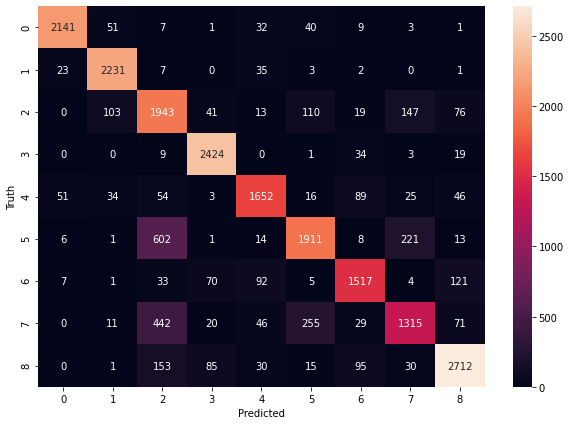

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Truth')